# ECG Arrhythmia Classification - Beat Holdout Method

## Objective:
This notebook implements classification of ECG arrhythmias using the **beat holdout validation protocol**. We train and evaluate two different classifiers:
1. Support Vector Machine (SVM) with RBF kernel
2. Random Forest Classifier

## Beat Holdout Method:
- **Training/Test Split:** 75% / 25% random split across all heartbeats
- **Data:** All heartbeats from all 47 patients are pooled together and randomly split
- **Data Leakage:** Beats from the same patient appear in both train and test sets (same patient's characteristics in both)
- **Result:** This typically leads to higher accuracy than patient holdout because the model has seen similar patterns from the same patients
- **Classes:** 8 arrhythmia types, balanced through resampling (3,874 samples each in training)

## Evaluation Metrics:
- Accuracy
- Precision (weighted average across classes)
- Recall (weighted average across classes)
- F1-Score (weighted average across classes)
- Confusion Matrix

## Expected Outcomes:
- High accuracy (>90%) due to beat-level splitting

***

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)

np.random.seed(42)

print("Libraries imported successfully.")

Libraries imported successfully.


***

## Load and Prepare Data

We load the preprocessed and resampled beat holdout datasets:
- `train_beats.csv`: Balanced training data (3,874 samples per class)
- `test_beats.csv`: Unbalanced test data (original class distribution)

In [2]:
# Load the beat holdout data
train_df = pd.read_csv('train_beats.csv', header=None)
test_df = pd.read_csv('test_beats.csv', header=None)

print("Data loaded successfully.")
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Data loaded successfully.
Training data shape: (30992, 277)
Test data shape: (37442, 277)


In [3]:
# Separate features and labels
X_train = train_df.iloc[:, :-2].values  # First 275 columns (ECG signal)
y_train = train_df.iloc[:, -2].values   # Second-to-last column (class label)

X_test = test_df.iloc[:, :-2].values
y_test = test_df.iloc[:, -2].values

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nUnique classes in training: {np.unique(y_train)}")
print(f"Training set is balanced: {len(np.unique(y_train, return_counts=True)[1]) == 8 and len(set(np.unique(y_train, return_counts=True)[1])) == 1}")

X_train shape: (30992, 275)
y_train shape: (30992,)
X_test shape: (37442, 275)
y_test shape: (37442,)

Unique classes in training: [1. 2. 3. 4. 5. 6. 7. 8.]
Training set is balanced: True


***

## Support Vector Machine (SVM) Classification

We use an SVM with RBF (Radial Basis Function) kernel, which is effective for non-linear classification problems.

In [4]:
# Initialize SVM classifier
print("Training SVM classifier...")
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_svm = svm_model.predict(X_test)
print("Predictions completed.")

Training SVM classifier...
Predictions completed.


### SVM Performance Evaluation

We evaluate the SVM classifier using multiple metrics:
- **Accuracy:** Overall correctness
- **Precision:** How many predicted positives are actually positive (weighted across classes)
- **Recall:** How many actual positives are correctly identified (weighted across classes)
- **F1-Score:** Harmonic mean of precision and recall (weighted across classes)
- **Confusion Matrix:** Shows which classes are confused with each other

In [5]:
# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print("=" * 50)
print("SVM CLASSIFIER RESULTS (Beat Holdout)")
print("=" * 50)
print(f"Accuracy:  {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall:    {svm_recall:.4f}")
print(f"F1-Score:  {svm_f1:.4f}")
print("=" * 50)

SVM CLASSIFIER RESULTS (Beat Holdout)
Accuracy:  0.9384
Precision: 0.9681
Recall:    0.9384
F1-Score:  0.9492


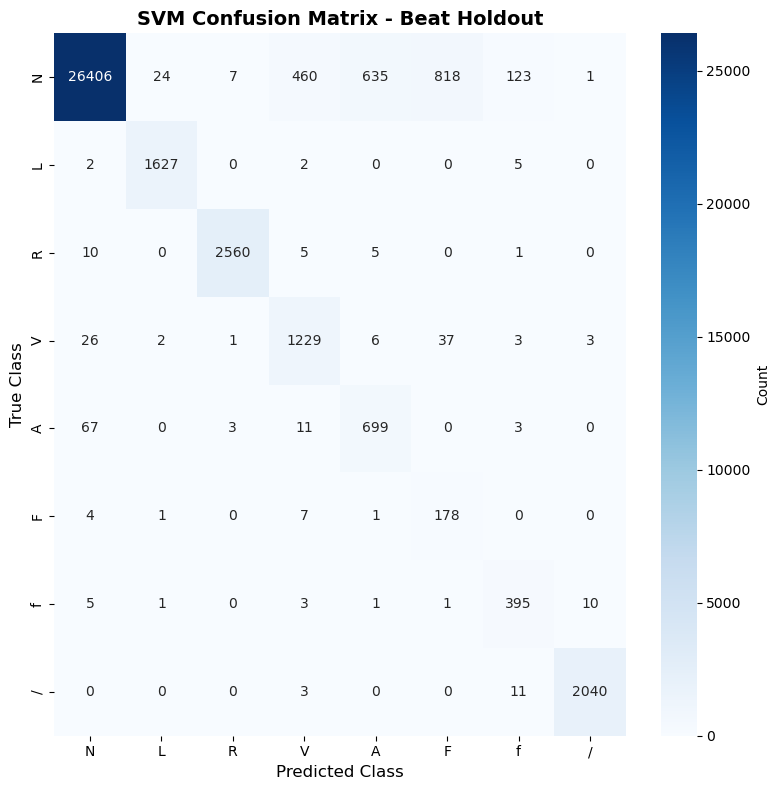


Confusion Matrix Analysis:
Diagonal values = correct predictions
Non-diagonal values = incorrect predictions


In [6]:
# Create confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Class names for labeling
class_names = ['N', 'L', 'R', 'V', 'A', 'F', 'f', '/']

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('SVM Confusion Matrix - Beat Holdout', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis:")
print("Diagonal values = correct predictions")
print("Non-diagonal values = incorrect predictions")

***

## Random Forest Classification

Random Forest is an ensemble method that builds multiple decision trees and combines their predictions. It's less prone to overfitting than individual decision trees and often provides good performance on tabular data.

In [7]:
# Initialize Random Forest classifier
print("Training Random Forest classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)
print("Predictions completed.")

Training Random Forest classifier...
Predictions completed.


### Random Forest Performance Evaluation

We evaluate the Random Forest classifier using the same metrics as SVM for direct comparison.

In [8]:
# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("=" * 50)
print("RANDOM FOREST RESULTS (Beat Holdout)")
print("=" * 50)
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print("=" * 50)

RANDOM FOREST RESULTS (Beat Holdout)
Accuracy:  0.9667
Precision: 0.9741
Recall:    0.9667
F1-Score:  0.9690


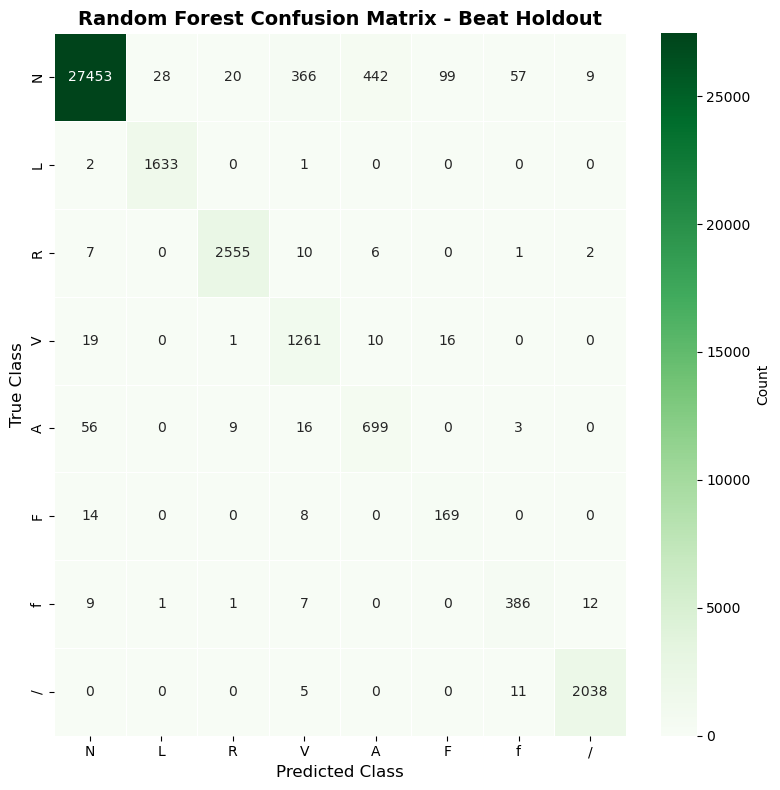


Confusion Matrix Analysis:
Diagonal values = correct predictions
Off-diagonal values = incorrect predictions


In [9]:
# Create confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Class names for labeling
class_names = ['N', 'L', 'R', 'V', 'A', 'F', 'f', '/']

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'},
            linewidths=0.5)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Random Forest Confusion Matrix - Beat Holdout', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis:")
print("Diagonal values = correct predictions")
print("Off-diagonal values = incorrect predictions")

***

## Model Comparison

We compare the performance of both classifiers to understand which performs better on the beat holdout validation protocol.

In [10]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1]
})

print("=" * 60)
print("MODEL COMPARISON - BEAT HOLDOUT")
print("=" * 60)
print(comparison_df.to_string(index=False))
print("=" * 60)

# Determine best model
best_model = 'Random Forest' if rf_accuracy > svm_accuracy else 'SVM'
print(f"\nBest performing model: {best_model}")
print(f"Accuracy difference: {abs(rf_accuracy - svm_accuracy):.4f}")

MODEL COMPARISON - BEAT HOLDOUT
   Metric      SVM  Random Forest
 Accuracy 0.938358       0.966668
Precision 0.968076       0.974144
   Recall 0.938358       0.966668
 F1-Score 0.949227       0.969001

Best performing model: Random Forest
Accuracy difference: 0.0283


***

## Saving Trained Models

We save both trained models.

In [11]:
# Save both models
with open('svm_beat_holdout.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
    print("File created: - svm_beat_holdout.pkl")
    
with open('rf_beat_holdout.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
    print("File created: - rf_beat_holdout.pkl")

print("Models saved successfully.")

File created: - svm_beat_holdout.pkl
File created: - rf_beat_holdout.pkl
Models saved successfully.


***

## Section 9: Summary and Key Findings

### Performance Results:
- **SVM Accuracy:** 93.84%
- **Random Forest Accuracy:** 96.67%
- **Winner:** Random Forest outperforms SVM by 2.83%

### Key Observations:

**1. High Overall Accuracy:**
Both models achieve >93% accuracy on the beat holdout test set. This high performance is expected due to the nature of beat-level splitting, where beats from the same patients appear in both training and test sets.

**2. Random Forest Advantage:**
Random Forest's ensemble approach (combining 100 decision trees) provides better generalization than the single SVM model, leading to higher accuracy across all metrics.

**3. Class-Specific Performance:**
Based on confusion matrices:
- Both models perform excellently on the Normal (N) class due to its large sample size
- Minority classes show more variability in predictions
- Some confusion occurs between similar arrhythmia types (e.g., fusion beats)

**4. Precision vs Recall:**
Both models show high precision (>96%), indicating that when they predict a class, they're usually correct. Recall values are slightly lower but still strong (>93%).

### Next Steps:
- Apply the same classifiers to **patient holdout** data to test generalization to unseen patients

***